# Regression Models On AC Prices

In [1]:
#importing all the packages required
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Reading

In [2]:
data = pd.read_excel(r"AC_Dataset_Cleaned.xlsx")

In [3]:
data = data.drop('Unnamed: 0',axis = 1)

In [4]:
data

Brand  Model Name  Type  Capacity in Tons  Star Rating  \
0              Blue Star  3WAE081YDF     1              0.75            3   
1              Blue Star  3WAE081YDF     1              0.75            3   
2              Blue Star   FS312YBTU     0              1.00            3   
3              Blue Star   FS312YBTU     0              1.00            3   
4              Blue Star   FS312YBTU     0              1.00            3   
..                   ...         ...   ...               ...          ...   
662  White Westing House   WWH123INA     0              1.00            3   
663  White Westing House   WWH243INA     0              2.00            3   
664  White Westing House   WWH243INA     0              2.00            3   
665  White Westing House   WWH243INA     0              2.00            3   
666  White Westing House   WWH243INA     0              2.00            3   

        Series Cooling and Heating  Cooling Capacity Compressor  \
0    YD Series                  No            2499.0     Rotary   
1    YD Series                  No            2499.0     Rotary   
2    No Series                  No            3323.0     Rotary   
3    No Series                  No            3323.0     Rotary   
4    No Series                  No            3323.0     Rotary   
..         ...                 ...               ...        ...   
662  No Series                  No            3500.0     Rotary   
663  No Series                  No            6300.0     Rotary   
664  No Series                  No            6300.0     Rotary   
665  No Series                  No            6300.0     Rotary   
666  No Series                  No            6300.0     Rotary   

    Dehumidification  ... Power Consumption  Price low Indoor Noise Level  \
0                Yes  ...             840.0  19990                     35   
1                Yes  ...             840.0  19990                     35   
2                Yes  ...             741.0  32490                     35   
3                Yes  ...             741.0  32490                     35   
4                Yes  ...             741.0  32490                     35   
..               ...  ...               ...    ...                    ...   
662              Yes  ...            1210.0  33999                      9   
663              Yes  ...            6300.0  54999                     43   
664              Yes  ...            6300.0  54999                     43   
665              Yes  ...            6300.0  54999                     43   
666              Yes  ...            6300.0  54999                     43   

    high Indoor Noise Level indoor W  indoor h  indoor d outdoor W outdoor h  \
0                        55     60.0      38.0      56.0      72.0      54.8   
1                        55     60.0      38.0      56.0      72.0      54.8   
2                        55     81.8      29.5      22.3      91.5      59.0   
3                        55    105.5      29.9      21.5      88.0      63.8   
4                        55     56.0      37.7      61.5      76.0      55.2   
..                      ...      ...       ...       ...       ...       ...   
662                      35     87.6      19.4      29.8      73.0      54.5   
663                      45    112.1      23.1      39.0      82.5      65.5   
664                      45    112.1      23.1      39.0      82.5      65.5   
665                      45    112.1      23.1      39.0      82.5      65.5   
666                      45    112.1      23.1      39.0      82.5      65.5   

    outdoor d  
0        26.5  
1        26.5  
2        35.0  
3        31.0  
4        25.6  
..        ...  
662      28.5  
663      31.0  
664      31.0  
665      31.0  
666      31.0  

[667 rows x 48 columns]

## Data Preparation Model

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Brand                         667 non-null    object 
 1   Model Name                    667 non-null    object 
 2   Type                          667 non-null    int64  
 3   Capacity in Tons              667 non-null    float64
 4   Star Rating                   667 non-null    int64  
 5   Series                        667 non-null    object 
 6   Cooling and Heating           667 non-null    object 
 7   Cooling Capacity              667 non-null    float64
 8   Compressor                    667 non-null    object 
 9   Dehumidification              667 non-null    object 
 10  Remote Control                667 non-null    object 
 11  Refrigerant                   667 non-null    object 
 12  Operating Modes               667 non-null    object 
 13  Techn

# Droping Not Useful Columns

In [6]:
data = data.drop('Model Name',axis = 1)

In [7]:
data = data.drop('Series',axis = 1)

In [8]:
data = data.drop('Operating Modes',axis = 1)

In [9]:
data = data.drop('Remote Control',axis = 1)

In [10]:
data = data.drop('Indoor Temperature Indicator',axis = 1)

In [11]:
data = data.drop('Dust Filter',axis = 1)

# Checking MultiColinearity

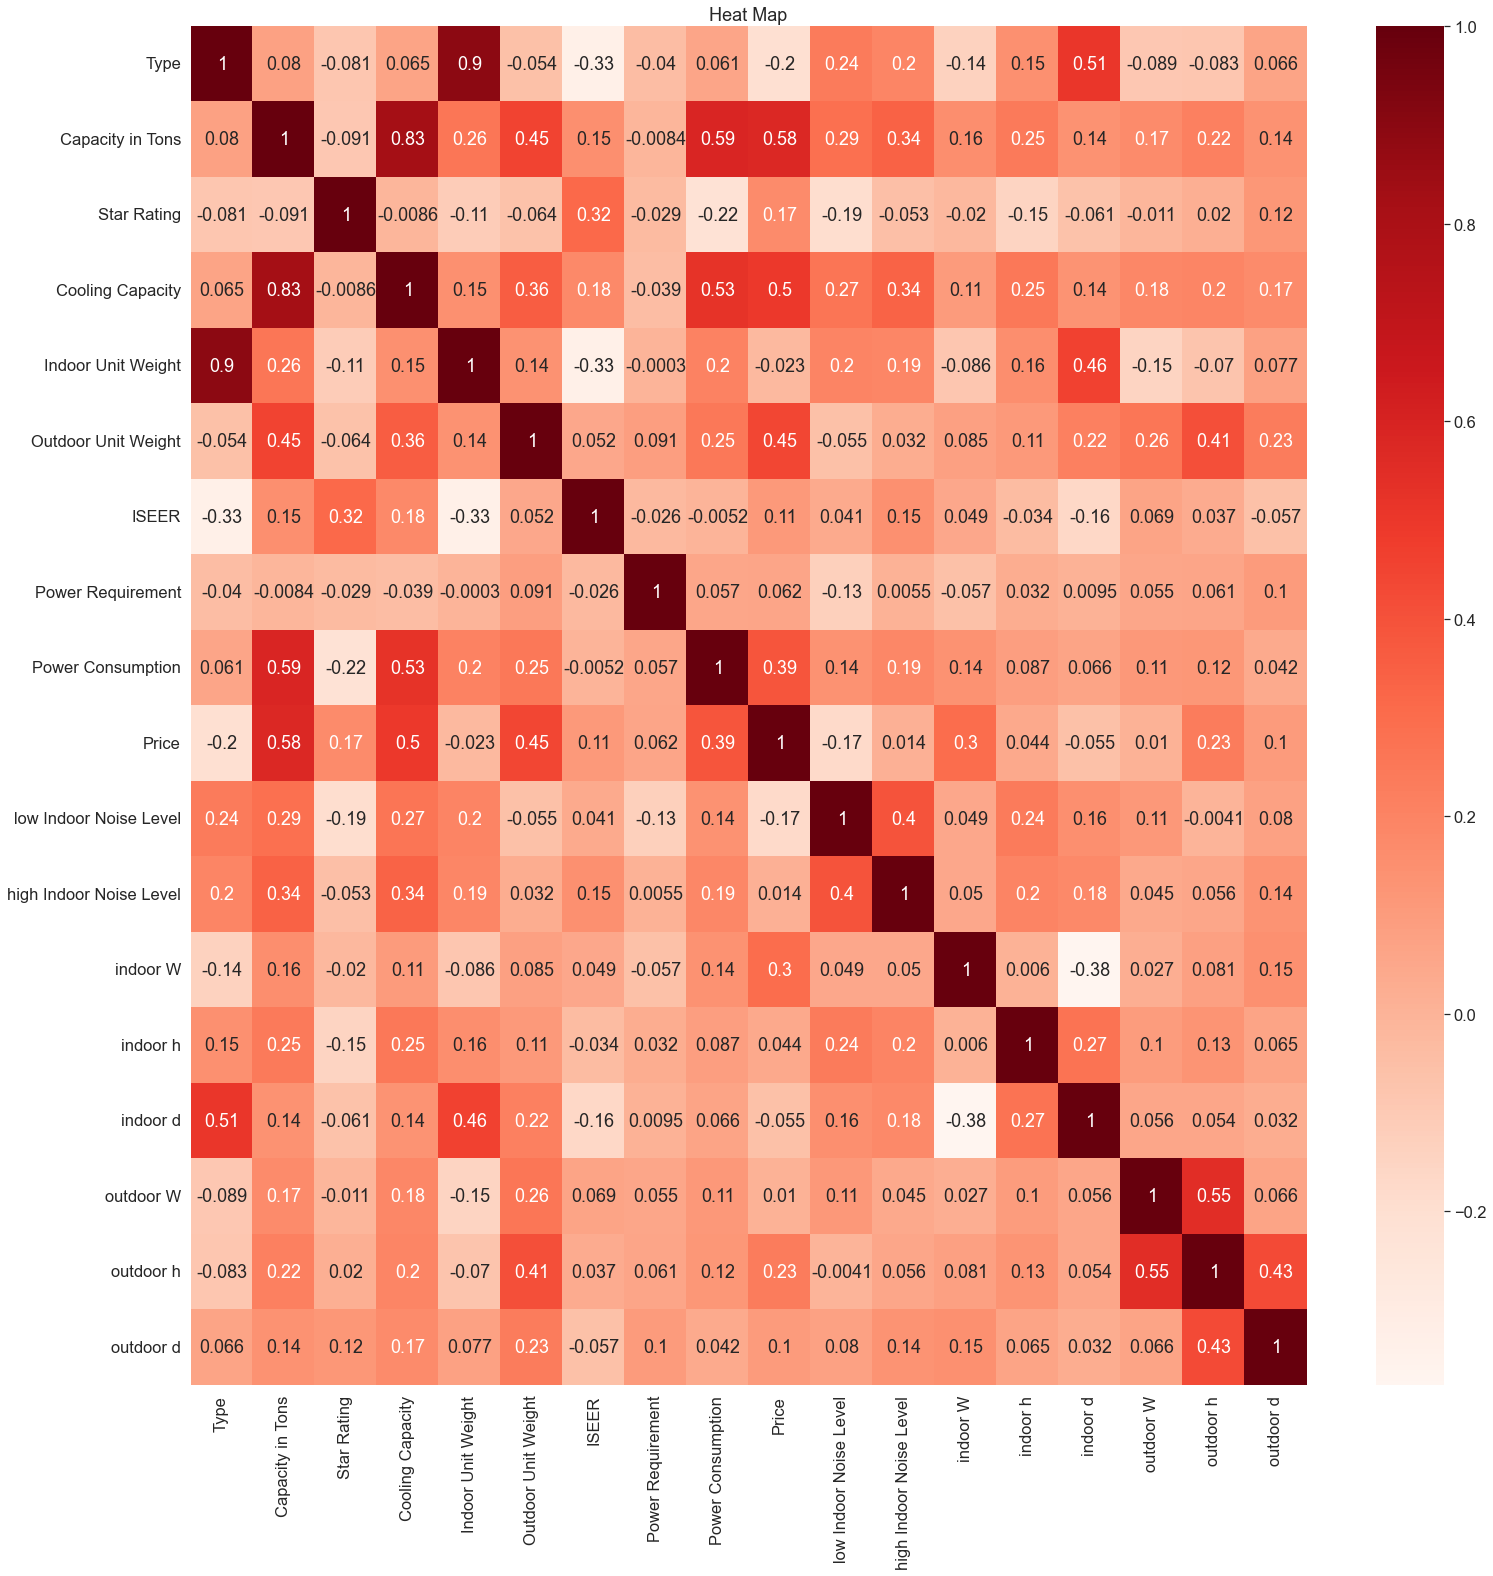

In [12]:
#for font size
sns.set(font_scale=1.5)

#setting style as dark
sns.set_style("dark")

#using .figure(figsize) for size
plt.figure(figsize=(25,25))

sns.heatmap(data.corr(),cmap=plt.cm.Reds,annot=True)

#.title() to give title to the graph
plt.title("Heat Map")

#to show graph
plt.show()

Outdoor w, outdoor h, power consumption , price, capacity in tons, cooling capacity have high muticolinearity but are essential columns, so can not drop the columns.

## Creating Dummies

In [13]:
#importing more packages
from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [14]:
#making dummy of integer columns which are category
data = pd.get_dummies(data, columns=['Type','Capacity in Tons','Star Rating'],drop_first=True)

In [15]:
data

Brand Cooling and Heating  Cooling Capacity  \
0              Blue Star                  No           2499.00   
1              Blue Star                  No           2499.00   
2              Blue Star                  No           3323.00   
3              Blue Star                  No           3323.00   
4              Blue Star                  No           3323.00   
5              Blue Star                  No           3370.00   
6              Blue Star                  No           3425.00   
7              Blue Star                  No           3370.00   
8              Blue Star                  No           3425.00   
9              Blue Star                  No           3370.00   
10             Blue Star                  No           3280.00   
11             Blue Star                  No           5000.00   
12             Blue Star                  No           5000.00   
13             Blue Star                  No           5078.00   
14             Blue Star                  No           5000.00   
15             Blue Star                  No           5000.00   
16             Blue Star                  No           4850.00   
17             Blue Star                  No           4850.00   
18             Blue Star                  No           4850.00   
19             Blue Star                  No           4850.00   
20             Blue Star                  No           4850.00   
21             Blue Star                  No           4850.00   
22             Blue Star                  No           4850.00   
23             Blue Star                  No           5030.00   
24             Blue Star                  No           5030.00   
25             Blue Star                  No           5010.00   
26             Blue Star                  No           5190.00   
27             Blue Star                  No           5030.00   
28             Blue Star                  No           5030.00   
29             Blue Star                  No           5190.00   
30             Blue Star                  No           6950.00   
31             Blue Star                  No           6530.00   
32             Blue Star                  No           6530.00   
33               CARRIER                  No           3550.00   
34               CARRIER                  No           3400.00   
35               CARRIER                  No           3400.00   
36               CARRIER                  No           3518.00   
37               CARRIER                  No           3900.00   
38               CARRIER                  No           3900.00   
39               CARRIER                  No           5100.00   
40               CARRIER                  No           5200.00   
41               CARRIER                  No           5200.00   
42               CARRIER                  No           5100.00   
43               CARRIER                  No           2500.00   
44               CARRIER                  No           6200.00   
45               CARRIER                  No           6200.00   
46               CARRIER                  No           6200.00   
47               CARRIER                  No           2500.00   
48               CARRIER                  No           6200.00   
49               CARRIER                  No           6200.00   
50                 Croma                  No           3500.00   
51                 Croma                  No           3500.00   
52                 Croma                  No           3250.00   
53                 Croma                  No           3500.00   
54                 Croma                  No           3500.00   
55                 Croma                  No           3500.00   
56                 Croma                  No           5150.00   
57                 Croma                  No           5150.00   
58                 Croma                  No           5150.00   
59                 Croma                  No           5150

In [16]:
# selecting all object columns in the variable data1
data1 = data.select_dtypes(include = ['object'])
data1.head()

Brand Cooling and Heating Compressor Dehumidification Refrigerant  \
0  Blue Star                  No     Rotary              Yes       R410A   
1  Blue Star                  No     Rotary              Yes       R410A   
2  Blue Star                  No     Rotary              Yes         R32   
3  Blue Star                  No     Rotary              Yes         R32   
4  Blue Star                  No     Rotary              Yes         R32   

                Technology Used Condenser Coil Panel Display Turbo Mode  \
0  Precision Cooling Technology         Copper           Yes         No   
1  Precision Cooling Technology         Copper           Yes         No   
2  Precision Cooling Technology         Copper           Yes         No   
3  Precision Cooling Technology         Copper           Yes        Yes   
4  Precision Cooling Technology         Copper           Yes        Yes   

         Evaporator Fin Type Condenser Fin Type Stepped Louvers  \
0  Hydrophilic Aluminium Fin    Ocean Black Fin              No   
1  Hydrophilic Aluminium Fin    Ocean Black Fin              No   
2    HYDROPHILIC Golden FINS    Ocean Black Fin              No   
3  Hydrophilic Aluminium Fin    Ocean Black Fin              No   
4  Hydrophilic Aluminium Fin    Ocean Black Fin              No   

  Auto Air Swing Air Flow Direction Anti-bacteria Filter Deodorizing Filter  \
0            Yes              4 Way                   No                Yes   
1            Yes              4 Way                   No                Yes   
2            Yes              4 Way                  Yes                 No   
3            Yes              4 Way                  Yes                 No   
4            Yes              4 Way                  Yes                 No   

  Auto Restart Timer Child Lock Quiet Mode Sleep Mode Memory Feature  \
0          Yes   Yes         No        Yes        Yes            Yes   
1          Yes   Yes         No        Yes        Yes            Yes   
2           No   Yes         No         No        Yes            Yes   
3           No   Yes         No         No        Yes            Yes   
4           No   Yes         No         No        Yes            Yes   

  Self Diagnosis Emergency Operational Button  
0            Yes                          Yes  
1            Yes                          Yes  
2            Yes                          Yes  
3             No                          Yes  
4             No                          Yes

In [17]:
#creating dummies of all object columns with dropping first dummy from each column by drop_first
dummies = pd.get_dummies(data1,drop_first = True)
dummies.head()

Brand_CARRIER  Brand_Croma  Brand_Daikin  Brand_Godrej  Brand_Haier  \
0              0            0             0             0            0   
1              0            0             0             0            0   
2              0            0             0             0            0   
3              0            0             0             0            0   
4              0            0             0             0            0   

   Brand_Hisense  Brand_Hitachi  Brand_IFB  Brand_IFFALCON by TCL  \
0              0              0          0                      0   
1              0              0          0                      0   
2              0              0          0                      0   
3              0              0          0                      0   
4              0              0          0                      0   

   Brand_IMPEX  Brand_Intex  Brand_LG  Brand_LIVPURE  Brand_Lloyd  Brand_LumX  \
0            0            0         0              0            0           0   
1            0            0         0              0            0           0   
2            0            0         0              0            0           0   
3            0            0         0              0            0           0   
4            0            0         0              0            0           0   

   Brand_MarQ By Flipkart  Brand_Micromax  Brand_Midea  Brand_O General  \
0                       0               0            0                0   
1                       0               0            0                0   
2                       0               0            0                0   
3                       0               0            0                0   
4                       0               0            0                0   

   Brand_ONIDA  Brand_Panasonic  Brand_SAMSUNG  Brand_Sansui  Brand_TCL  \
0            0                0              0             0          0   
1            0                0              0             0          0   
2            0                0              0             0          0   
3            0                0              0             0          0   
4            0                0              0             0          0   

   Brand_TOSHIBA  Brand_Voltas  Brand_Whirlpool  Brand_White Westing House  \
0              0             0                0                          0   
1              0             0                0                          0   
2              0             0                0                          0   
3              0             0                0                          0   
4              0             0                0                          0   

   Cooling and Heating_Yes  Compressor_DC Inverter Compressor  \
0                        0                                  0   
1                        0                                  0   
2                        0                                  0   
3                        0                                  0   
4                        0                                  0   

   Compressor_DC Rotary  Compressor_Digital Inverter Compressor  \
0                     0                                       0   
1                     0                                       0   
2                     0                                       0   
3                     0                                       0   
4                     0                                       0   

   Compressor_Dual Inverter Compressor  Compressor_Dual Rotary  \
0                                    0                       0   
1                                    0                       0   
2                                    0                       0   
3                                    0                       0   
4                                    0                       0   

   Compressor_Eco-Tropical Inverter  Compressor_Fixed Speed Compressor  \
0                   

In [18]:
#dropping columns of which we have made dummies
data = data.drop(list(data1.columns),axis=1)

#concatinating the dummy variables
data = pd.concat([data,dummies],axis=1)

#checking the shape
data.shape

(667, 152)

In [19]:
data

Cooling Capacity  Indoor Unit Weight  Outdoor Unit Weight  ISEER  \
0             2499.00                35.1                 27.8   3.00   
1             2499.00                35.1                 27.8   3.00   
2             3323.00                 9.0                 29.5   0.00   
3             3323.00                 9.0                 29.5   3.67   
4             3323.00                 9.0                 29.5   3.67   
5             3370.00                41.0                 28.0   3.53   
6             3425.00                11.0                 28.0   3.85   
7             3370.00                41.0                 28.0   3.53   
8             3425.00                11.0                 28.0   0.00   
9             3370.00                41.0                  0.0   2.91   
10            3280.00                51.0                  0.0   3.31   
11            5000.00                11.4                 37.0   4.65   
12            5000.00                11.4                 37.0   4.65   
13            5078.00                58.0                  0.0   2.93   
14            5000.00                11.8                 28.5   3.82   
15            5000.00                11.8                 28.5   3.82   
16            4850.00                 9.0                 26.8   3.85   
17            4850.00                 9.0                 26.8   3.85   
18            4850.00                 9.0                 26.8   3.85   
19            4850.00                 9.0                 26.8   3.85   
20            4850.00                 9.0                 26.8   3.85   
21            4850.00                 9.0                 26.8   3.85   
22            4850.00                 9.0                 26.8   3.85   
23            5030.00                11.8                 27.7   4.66   
24            5030.00                11.8                 27.7   4.66   
25            5010.00                12.0                 28.6   4.60   
26            5190.00                55.0                  0.0   3.57   
27            5030.00                11.8                 27.7   4.66   
28            5030.00                11.8                 27.7   4.66   
29            5190.00                55.0                  0.0   3.57   
30            6950.00                15.0                 38.0   0.00   
31            6530.00                15.0                 38.2   4.65   
32            6530.00                15.0                 38.2   4.65   
33            3550.00                 8.0                 28.0   3.62   
34            3400.00                42.0                 32.4   3.04   
35            3400.00                42.0                 32.4   3.04   
36            3518.00                 8.6                 24.7   0.00   
37            3900.00                10.5                 25.5   3.90   
38            3900.00                10.3                 28.0   4.74   
39            5100.00                54.0                  0.0   3.00   
40            5200.00                13.5                 31.0   4.00   
41            5200.00                10.3                 27.7   3.80   
42            5100.00                54.0                  0.0   3.00   
43            2500.00                42.0                 28.3   3.67   
44            6200.00                14.2                 44.0   3.62   
45            6200.00                14.2                 44.0   3.62   
46            6200.00                14.2                 44.0   3.62   
47            2500.00                42.0                 28.3   3.67   
48            6200.00                14.2                 44.0   3.62   
49            6200.00                14.2                 44.0   3.62   
50            3500.00                 9.3                 24.5   4.00   
51            3500.00                 9.3                 24.5   4.00   
52            3250.00                44.0                  0.0   2.91   
53            3500.00                 9.3                 24.5 

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 152 entries, Cooling Capacity to Emergency Operational Button_Yes
dtypes: float64(12), int64(3), uint8(137)
memory usage: 167.5 KB


## Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

In [22]:
#mean of Price Column
mean_of_array = df_test["Price"].mean()

#std. of Price column
std_of_array = df_test["Price"].std()

# Scaling The Data

In [23]:
#importing package
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
import warnings
warnings.filterwarnings('ignore')

#taking num_columns for scaling
num_vars = data.select_dtypes(exclude =["object","uint8"]).columns

num_vars = list(num_vars)

a = df_train

#scaling all integer columns
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head(10)

Cooling Capacity  Indoor Unit Weight  Outdoor Unit Weight     ISEER  \
100         -0.915310            3.123954            -3.366999 -0.672900   
156          2.062217           -0.213494             0.125526  0.073982   
58           0.722330           -0.361825             0.067317  1.781140   
430          0.555588           -0.072579            -0.072384 -0.246110   
493          0.573453           -0.428574            -0.130593  0.256892   
319          0.573453           -0.191244             0.067317  0.409316   
72          -0.796209            0.009003             1.056866  1.323865   
315          0.573453           -0.191244             0.067317  0.409316   
198         -1.130684           -0.510156            -0.654472 -0.154655   
200         -1.130684           -0.510156            -0.654472 -0.154655   

     Power Requirement  Power Consumption     Price  low Indoor Noise Level  \
100           0.172577          -0.378732 -0.814031                0.010902   
156           0.172577           0.032824  1.486123                0.010902   
58            0.172577           0.139094  0.245975                0.010902   
430           0.172577           0.731116 -0.431631                2.052524   
493           0.172577          -0.517710 -0.206615                1.738428   
319           0.172577           0.301398 -0.687332                0.010902   
72            0.172577          -0.700248  1.204980               -1.402528   
315           0.172577           0.301398 -0.687332                0.010902   
198           0.172577          -0.918847 -0.431631                0.010902   
200           0.172577          -0.918847 -0.431631                0.010902   

     high Indoor Noise Level  indoor W  indoor h  indoor d  outdoor W  \
100                 0.658731 -0.160792 -0.295231 -0.285781  -0.717189   
156                 0.658731 -3.422592  6.588985  0.220515  -1.110159   
58                 -0.055101  0.979144 -0.295231 -0.312428   0.187383   
430                 0.658731  1.289523 -0.256718 -0.445663   0.928836   
493                 0.658731  0.352743 -0.256718 -0.445663  -0.257489   
319                 0.658731 -2.971132 -0.969210  0.120588   0.595182   
72                 -0.972886 -0.149506 -0.266346 -0.352398   0.076165   
315                 0.658731 -2.971132 -0.969210  0.120588   0.595182   
198                -2.808454  0.059294 -0.170064 -0.618870  -0.279732   
200                -2.808454  0.059294 -0.170064 -0.618870  -0.279732   

     outdoor h  outdoor d  Type_1  Capacity in Tons_1.0  Capacity in Tons_1.2  \
100  -0.204985  -0.261593       1                     1                     0   
156   2.722586  -0.093783       0                     0                     0   
58    0.111193  -0.607701       0                     0                     0   
430   1.059726   0.115979       0                     0                     0   
493   0.005800  -0.355986       0                     0                     0   
319   0.087772  -0.041342       0                     0                     0   
72    0.029221  -0.146224       0                     1                     0   
315   0.087772  -0.041342       0                     0                     0   
198  -0.614845  -0.723071       0                     1                     0   
200  -0.614845  -0.723071       0                     1                     0   

     Capacity in Tons_1.5  Capacity in Tons_1.6  Capacity in Tons_1.8  \
100                     0                     0                     0   
156                     0                     0                     0   
58                      1                     0                     0   
430                     1                     0                     0   
493                     1                     0                     0   
319                     1                     0                     0   
72                      0                     0                     0   
315               

In [25]:
#assigning dependent and independent variables
y_train = df_train.pop('Price')
X_train = df_train


## Detailed Stats Model(Linear Regression)

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#fitting model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [27]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train)

lm = sm.OLS(y_train,X_train_rfe).fit()

In [28]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     97.28
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          2.27e-242
Time:                        16:12:16   Log-Likelihood:                 181.55
No. Observations:                 533   AIC:                            -93.09
Df Residuals:                     398   BIC:                             484.5
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

As The Linear Regression Is showing Overfitting results and their is multi colinerity present in the columns, so linear regression is not able to give accurate results, checking Vif for multi colineraity.

## Vif On Linear Regression

In [29]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [30]:
#vif checking
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
59                   Compressor_Fixed Speed Compressor     inf
47                                           Brand_TCL     inf
68                                   Compressor_Rotary     inf
67                     Compressor_Neo Swing Compressor     inf
66                                Compressor_Neo Swing     inf
65                          Compressor_Inverter Rotary     inf
64                                 Compressor_Inverter     inf
63         Compressor_Hyper Tropical Rotary Compressor     inf
61                   Compressor_High EER Rotary - BLDC     inf
60                          Compressor_High EER Rotary     inf
118        Evaporator Fin Type_HYDROPHILIC Golden FINS     inf
58                    Compressor_Eco-Tropical Inverter     inf
57                              Compressor_Dual Rotary     inf
56                 Compressor_Dual Inverter Compressor     inf
55              Compressor_Digital Inverter Compressor     inf
54                                Compressor_DC Rotary     inf
53                   Compressor_DC Inverter Compressor     inf
51                           Brand_White Westing House     inf
50                                     Brand_Whirlpool     inf
69                Compressor_Smart Inverter Compressor     inf
70                              Compressor_Twin Rotary     inf
71                     Compressor_Twin Rotary Inverter     inf
102                           Condenser Coil_Aluminium     inf
116                         Evaporator Fin Type_Copper     inf
115           Evaporator Fin Type_Blue Evaporator Fins     inf
119      Evaporator Fin Type_Hydrophilic Aluminium Fin     inf
120          Evaporator Fin Type_Hydrophilic Blue Fins     inf
121                     Evaporator Fin Type_Titan Gold     inf
108                          Panel Display_LED Digital     inf
103                              Condenser Coil_Copper     inf
100                    Technology Used_Triple Inverter     inf
72                Compressor_Ultra-Inverter Compressor     inf
124                            Condenser Fin Type_Bare     inf
94   Technology Used_MPFI Technology, 6th Sense Ene...     inf
93                 Technology Used_Inverter Technology     inf
80           Technology Used_Coanda Airflow Technology     inf
79             Technology Used_Auto Climate Technology     inf
78        Technology Used_AI Ultra-Inverter Technology     inf
74                                    Refrigerant_R290     inf
48                                       Brand_TOSHIBA     inf
117                     Evaporator Fin Type_Golden Fin     inf
32                               Brand_IFFALCON by TCL     inf
135                      Condenser Fin Type_Titan Gold     inf
28                                         Brand_Haier     inf
134  Condenser Fin Type_PFC with Golden Anti Corros...     inf
147                                     Sleep Mode_Yes     inf
21                                       Star Rating_3  445.12
23                                       Star Rating_5  364.14
84                         Technology Used_Dual Rotary  263.49
92                            Technology Used_Inverter  236.46
45                                       Brand_SAMSUNG  226.87
22                                       Star Rating_4  220.56
130                      Condenser Fin Type_Golden Fin  206.33
111                                   Panel Display_No  203.47
125            Condenser Fin Type_Blue Evaporator Fins  202.86
37                                         Brand_Lloyd  192.88
95        Technology Used_Precision Cooling Technology  176.13
35                                            Brand_LG  171.71
131           Condenser Fin Type_Hydrophilic Blue Fins  168.82
82                           Technology Used_Dual Cool  168.06
113                                  Panel Display_Yes  158.12
38                                          Brand_LumX  151.92
1                                   Indoor Unit Weight  141.49
85            

As many columns have inf. value and high variance factor the linear regression is not applied and we apply Lasso Regularization Method to get some better results.

## Lasso Regression

In [31]:
#for implementing Ridge and Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


#list of alpha for tuning
folds = 4

params = {'alpha' : [0.001 , 0.001,0.01,0.05,
                     0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,.9,
                     1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,
                     10.0,20,30,40,50,100,500,1000]}

#lasso object
lasso = Lasso()

#lets find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train) 


Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    2.4s finished


GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [32]:
#printing again 
print(model_cv1.best_params_)
print(model_cv1.best_score_)

{'alpha': 0.001}
0.8153656592339489


In [33]:
#taking the best alpha value
alpha = 0.001
lasso = Lasso(alpha=alpha)

#fitting in model
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [34]:
#making x_test and y_test with scaler values
num_vars = data.select_dtypes(exclude =["object","uint8"]).columns

num_vars = list(num_vars)

b = df_test

df_test[num_vars] = scaler.transform(df_test[num_vars])

y_test = df_test.pop('Price')
X_test = df_test

In [35]:
#predicting the values of y
y_test_pred = lasso.predict(X_test)

#printing accuracy score
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9436687898813442


As the Test, Train Variance is high, the results are not upto the mark, so we take the important columns given by lasso and see and analyse if it has taken into consideration important columns or not.

## Lasso Important Columns

In [36]:
#saving coef. of ridge and lasso in every column and saving in DataFrame
coef = pd.DataFrame(index = X.columns)
coef.rows = X.columns
coef["lasso"] = lasso.coef_
c= coef.transpose()

In [37]:
#printing coef
coef

lasso
Cooling Capacity                                    0.139492
Indoor Unit Weight                                 -0.154678
Outdoor Unit Weight                                -0.010608
ISEER                                              -0.023853
Power Requirement                                   0.105249
Power Consumption                                   0.026196
low Indoor Noise Level                              0.047495
high Indoor Noise Level                            -0.033815
indoor W                                            0.154385
indoor h                                            0.031404
indoor d                                            0.023661
outdoor W                                          -0.085386
outdoor h                                           0.115620
outdoor d                                          -0.022463
Type_1                                             -0.554440
Capacity in Tons_1.0                                0.040192
Capacity in Tons_1.2                                0.000000
Capacity in Tons_1.5                                0.387597
Capacity in Tons_1.6                                0.000000
Capacity in Tons_1.8                                1.143272
Capacity in Tons_2.0                                1.784586
Star Rating_3                                      -0.000000
Star Rating_4                                       0.457373
Star Rating_5                                       0.598100
Brand_CARRIER                                      -0.000000
Brand_Croma                                        -0.211842
Brand_Daikin                                        0.506966
Brand_Godrej                                       -0.435581
Brand_Haier                                         0.194046
Brand_Hisense                                      -0.000000
Brand_Hitachi                                       0.000000
Brand_IFB                                          -0.206344
Brand_IFFALCON by TCL                              -0.162186
Brand_IMPEX                                         0.000000
Brand_Intex                                        -0.000000
Brand_LG                                            0.144048
Brand_LIVPURE                                       1.251409
Brand_Lloyd                                         0.000000
Brand_LumX                                         -0.145756
Brand_MarQ By Flipkart                             -0.248956
Brand_Micromax                                     -0.000000
Brand_Midea                                        -1.048048
Brand_O General                                     2.423103
Brand_ONIDA                                        -0.726471
Brand_Panasonic                                     0.000000
Brand_SAMSUNG                                       0.021694
Brand_Sansui                                       -0.000000
Brand_TCL                                          -0.798372
Brand_TOSHIBA                                       0.230158
Brand_Voltas                                        0.000000
Brand_Whirlpool                                     0.000000
Brand_White Westing House                          -0.000000
Cooling and Heating_Yes                             0.077069
Compressor_DC Inverter Compressor                   0.570773
Compressor_DC Rotary                                0.212194
Compressor_Digital Inverter Compressor              0.000000
Compressor_Dual Inverter Compressor                 0.000000
Compressor_Dual Rotary                             -0.000000
Compressor_Eco-Tropical Inverter                   -0.003138
Compressor_Fixed Speed Compressor                   0.000000
Compressor_High EER Rotary                         -0.000000
Compressor_High EER Rotary - BLDC                  -0.173789
Compressor_High EER Twin Rotary - BLDC              0.000000
Compressor_Hyper Tropical Rotary Compressor        -0.000000
Compressor_Inverter                                -0.113385
Compressor_Inverter Rotary   

After Analysing the columns, as their was huge variance in predictions, we apply Decision Tree Algorithm, on the data for better predictions.

## Decision Tree Regression(Building Basic Model)

In [38]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [39]:
#predictions
y_pred = regressor.predict(X_test)

In [40]:
#predictions accuracy
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.9364858712949704

## Post Pruning Decision Tree Regression

In [41]:
from sklearn.metrics import roc_auc_score
# Allow a decision tree to grow to its full depth
clf = DecisionTreeRegressor(random_state = 0)
clf.fit(X_train, y_train)

# compute ccp_alpha values
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# train DT classifier for each ccp_alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Plot train and test score for each of the above trained model    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [r2_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [r2_score(y_test, clf.predict(X_test)) for clf in clfs]

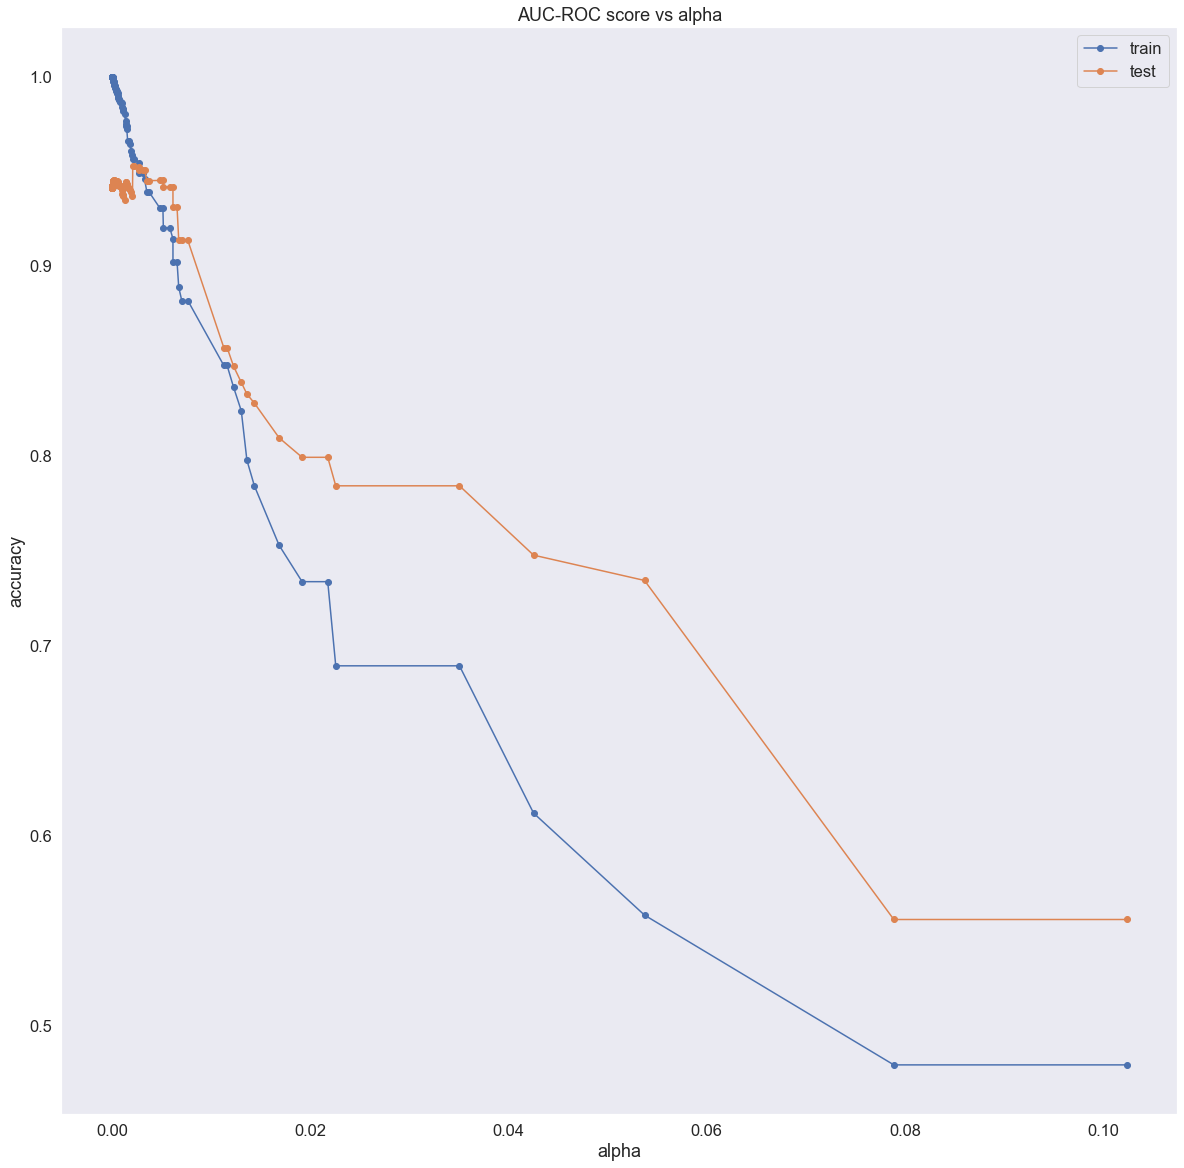

<Figure size 1440x1440 with 0 Axes>

In [42]:
#plotting train test accuracy for alpha values 
fig, ax = plt.subplots(figsize = (20,20))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("AUC-ROC score vs alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.figure(figsize = (20,20))
plt.show()

In [43]:
#as we see the value is approx. close to 0.01 we take it as 0.005 and
#run the model as test and train accuracy both are Close
clf = DecisionTreeRegressor(random_state=42, ccp_alpha=0.005)
clf.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.005, random_state=42)

In [44]:
#predictions
pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score

#test score
r2_score(y_test, pred)

0.945286841840317

In [45]:
#train score
clf.score(X_train,y_train)

0.9305969640754779

As the variance and bias between the test and train are not more we can consider this model and check the tree that is made by the model at the alpha 0.005.

## Tree At Alpha 0.005

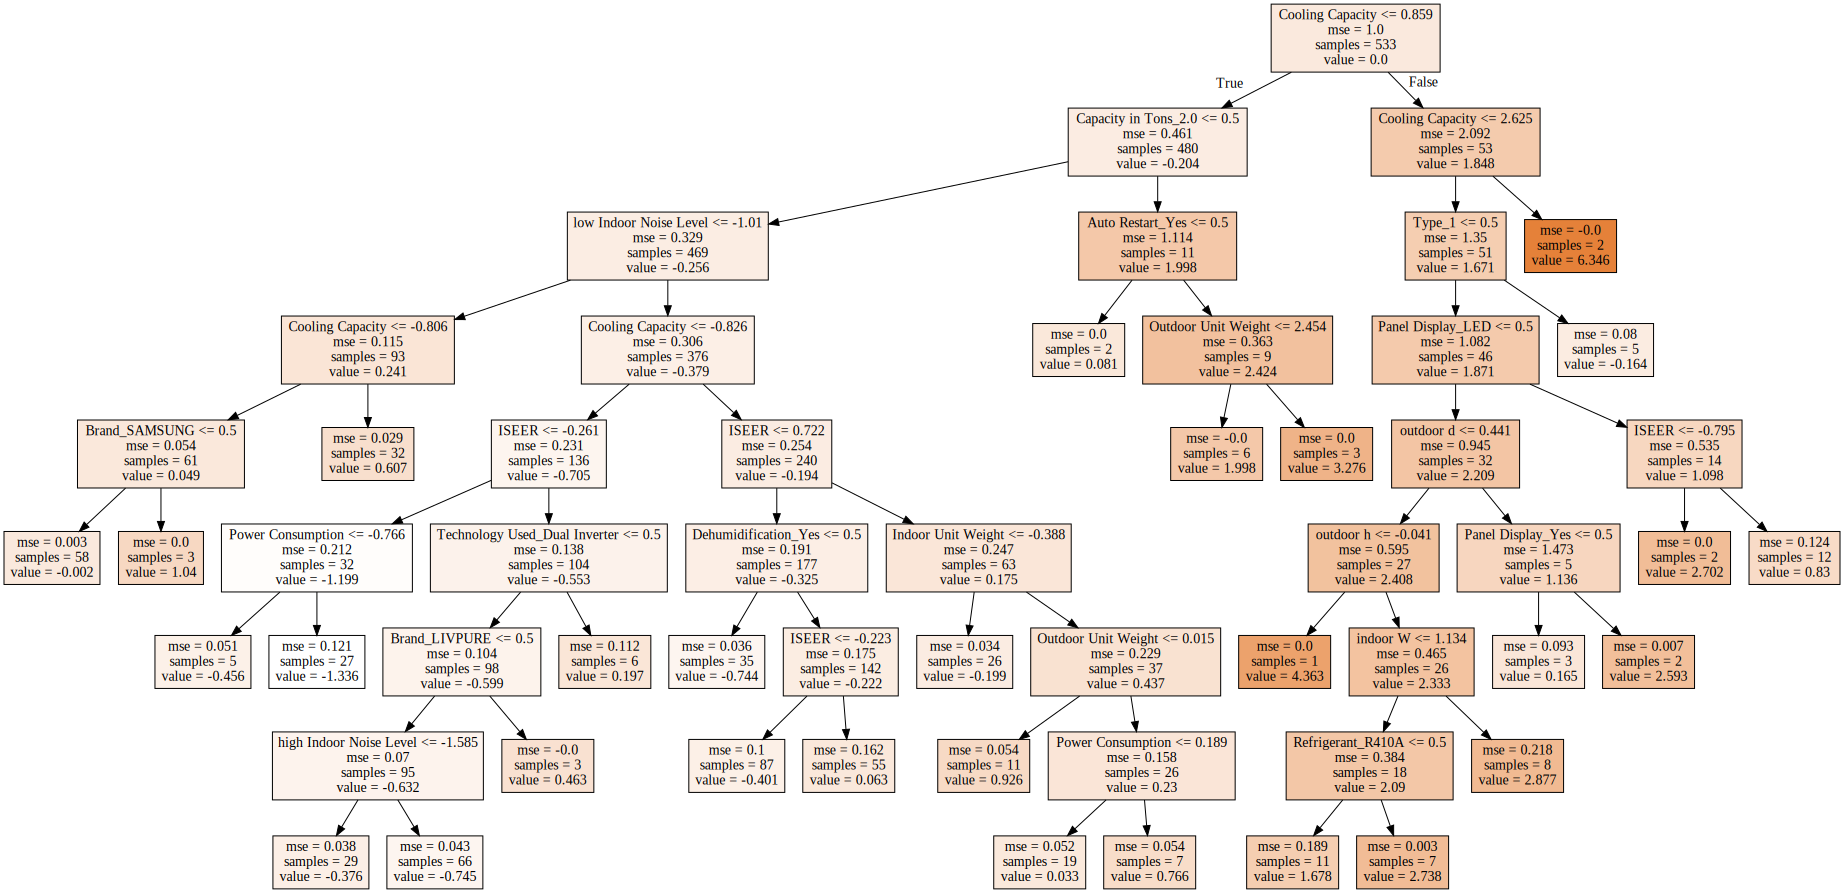

In [46]:
import graphviz
from sklearn import tree
import pylab
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 


graph

## Regression Plot

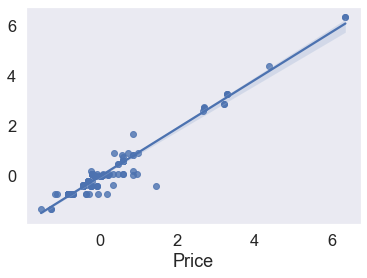

In [47]:
#plot predictions(scaled data)
sns.regplot(y_test,pred)

## Comparing Important Feature of Lasso And Decision Tree

In [48]:
#dataframe
importance = pd.DataFrame({'Features':X_test.columns, 'Importance_Decision_Tree':clf.feature_importances_, 'Importance_Lasso':lasso.coef_})

In [49]:
importance

Features  \
0                                     Cooling Capacity   
1                                   Indoor Unit Weight   
2                                  Outdoor Unit Weight   
3                                                ISEER   
4                                    Power Requirement   
5                                    Power Consumption   
6                               low Indoor Noise Level   
7                              high Indoor Noise Level   
8                                             indoor W   
9                                             indoor h   
10                                            indoor d   
11                                           outdoor W   
12                                           outdoor h   
13                                           outdoor d   
14                                              Type_1   
15                                Capacity in Tons_1.0   
16                                Capacity in Tons_1.2   
17                                Capacity in Tons_1.5   
18                                Capacity in Tons_1.6   
19                                Capacity in Tons_1.8   
20                                Capacity in Tons_2.0   
21                                       Star Rating_3   
22                                       Star Rating_4   
23                                       Star Rating_5   
24                                       Brand_CARRIER   
25                                         Brand_Croma   
26                                        Brand_Daikin   
27                                        Brand_Godrej   
28                                         Brand_Haier   
29                                       Brand_Hisense   
30                                       Brand_Hitachi   
31                                           Brand_IFB   
32                               Brand_IFFALCON by TCL   
33                                         Brand_IMPEX   
34                                         Brand_Intex   
35                                            Brand_LG   
36                                       Brand_LIVPURE   
37                                         Brand_Lloyd   
38                                          Brand_LumX   
39                              Brand_MarQ By Flipkart   
40                                      Brand_Micromax   
41                                         Brand_Midea   
42                                     Brand_O General   
43                                         Brand_ONIDA   
44                                     Brand_Panasonic   
45                                       Brand_SAMSUNG   
46                                        Brand_Sansui   
47                                           Brand_TCL   
48                                       Brand_TOSHIBA   
49                                        Brand_Voltas   
50                                     Brand_Whirlpool   
51                           Brand_White Westing House   
52                             Cooling and Heating_Yes   
53                   Compressor_DC Inverter Compressor   
54                                Compressor_DC Rotary   
55              Compressor_Digital Inverter Compressor   
56                 Compressor_Dual Inverter Compressor   
57                              Compressor_Dual Rotary   
58                    Compressor_Eco-Tropical Inverter   
59                   Compressor_Fixed Speed Compressor   
60                          Compressor_High EER Rotary   
61                   Compressor_High EER Rotary - BLDC   
62              Compressor_High EER Twin Rotary - BLDC   
63         Compressor_Hyper Tropical Rotary Compressor   
64                                 Compressor_Inverter   
65                          Compressor_Inverter Rotary   
66                                Compressor_Neo Swing   
67                     Compressor_Neo Swing Compressor   
68                                   Compres

In [50]:
#sorting values by decision tree important columns
importance.sort_values(by = "Importance_Decision_Tree",ascending = False)

Features  \
0                                     Cooling Capacity   
20                                Capacity in Tons_2.0   
3                                                ISEER   
6                               low Indoor Noise Level   
14                                              Type_1   
107                                  Panel Display_LED   
143                                   Auto Restart_Yes   
73                                Dehumidification_Yes   
113                                  Panel Display_Yes   
2                                  Outdoor Unit Weight   
13                                           outdoor d   
1                                   Indoor Unit Weight   
5                                    Power Consumption   
77                                   Refrigerant_R410A   
12                                           outdoor h   
83                       Technology Used_Dual Inverter   
36                                       Brand_LIVPURE   
8                                             indoor W   
45                                       Brand_SAMSUNG   
7                              high Indoor Noise Level   
103                              Condenser Coil_Copper   
104                       Panel Display_Hidden Display   
105                   Panel Display_Hidden LED Display   
106                     Panel Display_LCD with Backlit   
86    Technology Used_Eco Tropical Inverter Technology   
108                          Panel Display_LED Digital   
109                    Panel Display_LED Magic Display   
110                        Panel Display_Magic Display   
101  Technology Used_Twin Rotary Compressor Technology   
111                                   Panel Display_No   
112             Panel Display_Room Temperature Display   
102                           Condenser Coil_Aluminium   
97                   Technology Used_Rotary Compressor   
100                    Technology Used_Triple Inverter   
99       Technology Used_Streamer Discharge Technology   
98   Technology Used_Rotary Compressor with BLDC motor   
87   Technology Used_Flexicool, Hybridjet, Insta Ko...   
96                              Technology Used_Rotary   
95        Technology Used_Precision Cooling Technology   
94   Technology Used_MPFI Technology, 6th Sense Ene...   
114                                     Turbo Mode_Yes   
92                            Technology Used_Inverter   
91                 Technology Used_Insta Kool, AI Cool   
85              Technology Used_Dual Rotary Compressor   
90                          Technology Used_Insta Kool   
89            Technology Used_Himalaya Cool Technology   
88   Technology Used_Follow Me Technology,Turbo Coo...   
93                 Technology Used_Inverter Technology   
121                     Evaporator Fin Type_Titan Gold   
115           Evaporator Fin Type_Blue Evaporator Fins   
141                           Anti-bacteria Filter_Yes   
135                      Condenser Fin Type_Titan Gold   
136                                Stepped Louvers_Yes   
137                                 Auto Air Swing_Yes   
138                           Air Flow Direction_4 Way   
139                      Air Flow Direction_Horizontal   
140             Air Flow Direction_Up/Down Swing Flaps   
142                             Deodorizing Filter_Yes   
116                         Evaporator Fin Type_Copper   
144                                          Timer_Yes   
145                                     Child Lock_Yes   
146                                     Quiet Mode_Yes   
147                                     Sleep Mode_Yes   
148                                 Memory Feature_Yes   
149                                 Self Diagnosis_Yes   
134  Condenser Fin Type_PFC with Golden Anti Corros...   
133                 Condenser Fin Type_Ocean Black Fin   
132           Condenser Fin Type_Hydrophobic Aluminium   
131           Condenser Fin Type_Hydrophilic

## Converting Scaled Into Original Data(Y_test and Pred)

In [54]:
#predicitons scalling
pred = (pred * std_of_array) + mean_of_array

In [55]:
pred

array([ 37443.92945251,  42873.14170982,  46054.70857156,  42873.14170982,
        36800.34128623,  32820.8797009 ,  37443.92945251,  42873.14170982,
        80310.5017133 ,  42873.14170982,  33068.24330317,  32820.8797009 ,
        33068.24330317,  36800.34128623,  32820.8797009 ,  36800.34128623,
        29399.21407614,  34837.55373089,  36800.34128623,  64117.50045787,
        29399.21407614,  29399.21407614,  29399.21407614,  33068.24330317,
        36800.34128623,  33068.24330317,  46054.70857156,  32820.8797009 ,
        37443.92945251,  29407.16321318,  41439.28777094,  32820.8797009 ,
        34837.55373089,  32820.8797009 ,  45099.12938966,  45099.12938966,
        36800.34128623,  32820.8797009 ,  37148.69726218,  32820.8797009 ,
       100076.19538649,  29399.21407614,  23498.95987112,  29399.21407614,
        33068.24330317,  36800.34128623,  29407.16321318,  29407.16321318,
        38786.06190562,  32820.8797009 ,  69477.54045068,  37443.92945251,
        29399.21407614,  

In [56]:
#actuall scalling
y_test = (y_test  * std_of_array) + mean_of_array
y_test

500     34761.085769
540     42713.753802
633     40432.459607
227     42713.753802
103     35704.190632
453     32518.025555
97      36067.413451
558     42713.753802
342     80310.501713
546     42713.753802
173     32518.025555
142     34429.724601
149     33155.258570
593     37106.103266
125     34429.724601
589     37106.103266
152     33155.258570
619     33792.491586
108     35704.190632
454     63755.187972
371     28694.627462
408     29331.860477
396     29331.860477
203     32518.025555
106     35704.190632
69      40177.566400
24      46537.151895
440     32518.025555
277     41452.032431
299     29969.093493
235     41439.287771
458     32518.025555
607     33792.491586
114     34429.724601
272     42599.051859
48      45262.685864
575     37106.103266
169     51187.678441
518     37615.889678
472     32518.025555
339    100076.195386
54      28579.925519
159     24233.996354
387     28694.627462
191     32518.025555
259     36977.382197
73      38775.653766
628     25750

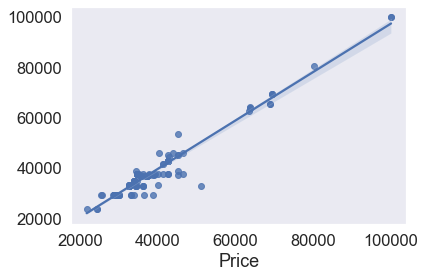

In [57]:
#scalled plot
sns.regplot(y_test,pred)

## Predictions DataFrame

In [63]:
Predictions_Price = pd.DataFrame({'ID':y_test.index,'Actuall Price': y_test.values, 'Predictions':pred})

In [64]:
Predictions_Price

ID  Actuall Price    Predictions
0    500   34761.085769   37443.929453
1    540   42713.753802   42873.141710
2    633   40432.459607   46054.708572
3    227   42713.753802   42873.141710
4    103   35704.190632   36800.341286
5    453   32518.025555   32820.879701
6     97   36067.413451   37443.929453
7    558   42713.753802   42873.141710
8    342   80310.501713   80310.501713
9    546   42713.753802   42873.141710
10   173   32518.025555   33068.243303
11   142   34429.724601   32820.879701
12   149   33155.258570   33068.243303
13   593   37106.103266   36800.341286
14   125   34429.724601   32820.879701
15   589   37106.103266   36800.341286
16   152   33155.258570   29399.214076
17   619   33792.491586   34837.553731
18   108   35704.190632   36800.341286
19   454   63755.187972   64117.500458
20   371   28694.627462   29399.214076
21   408   29331.860477   29399.214076
22   396   29331.860477   29399.214076
23   203   32518.025555   33068.243303
24   106   35704.190632   36800.341286
25    69   40177.566400   33068.243303
26    24   46537.151895   46054.708572
27   440   32518.025555   32820.879701
28   277   41452.032431   37443.929453
29   299   29969.093493   29407.163213
30   235   41439.287771   41439.287771
31   458   32518.025555   32820.879701
32   607   33792.491586   34837.553731
33   114   34429.724601   32820.879701
34   272   42599.051859   45099.129390
35    48   45262.685864   45099.129390
36   575   37106.103266   36800.341286
37   169   51187.678441   32820.879701
38   518   37615.889678   37148.697262
39   472   32518.025555   32820.879701
40   339  100076.195386  100076.195386
41    54   28579.925519   29399.214076
42   159   24233.996354   23498.959871
43   387   28694.627462   29399.214076
44   191   32518.025555   33068.243303
45   259   36977.382197   36800.341286
46    73   38775.653766   29407.163213
47   628   25750.610931   29407.163213
48   174   34441.194795   38786.061906
49   118   34429.724601   32820.879701
50   332   69477.540451   69477.540451
51   499   34761.085769   37443.929453
52   240   25392.485976   29399.214076
53   412   29331.860477   29399.214076
54   241   29969.093493   29399.214076
55   390   28694.627462   29399.214076
56   206   45262.685864   38786.061906
57   658   33931.408383   29399.214076
58   334   69477.540451   69477.540451
59   609   33792.491586   34837.553731
60   284   36169.370733   32820.879701
61   509   34761.085769   37443.929453
62   163   24233.996354   23498.959871
63   487   34761.085769   34837.553731
64   218   42713.753802   37443.929453
65   574   37106.103266   36800.341286
66   459   32518.025555   32820.879701
67   611   33792.491586   34837.553731
68   379   28694.627462   29399.214076
69   117   39258.676392   37443.929453
70   449   32518.025555   32820.879701
71   425   32518.025555   32820.879701
72   205   32518.025555   33068.243303
73     3   33155.258570   29399.214076
74   436   32518.025555   32820.879701
75   104   35704.190632   36800.341286
76   105   35704.190632   36800.341286
77   498   34761.085769   37443.929453
78   433   32518.025555   32820.879701
79   231   41439.287771   41439.287771
80   548   42713.753802   42873.141710
81   522   68840.307435   65503.755366
82   405   29331.860477   29399.214076
83    31   63499.020300   62664.882283
84   479   32518.025555   32820.879701
85   519   68840.307435   65503.755366
86   252   36977.382197   36800.341286
87   384   28694.627462   29399.214076
88   614   33792.491586   34837.553731
89   616   33792.491586   34837.553731
90   660   38890.355709   37148.697262
91   265   36977.382197   36800.341286
92   381   28694.627462   29399.214076
93   395   29331.860477   29399.214076
94   476   63755.187972   63755.187972
95   484   34761.085769   37443.929453
96   268   36977.382197   36800.341286
97   486   34761.085769   37443.929453
98   155   45262.685864   37148.697262
99   594   37106.103266   36800.341286
100  213   46460.683933   37443.929453
101  448   63755.187972   63

In [65]:
Predictions_Price.to_excel("Price_Predicted_Results.xlsx")